<a href="https://colab.research.google.com/github/Sidhtang/unboxing-community-project/blob/main/Unboxing_community_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# @title Data Cleaninig
df = pd.read_csv('/content/laptop_data[1].csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [9]:
df['Weight']=df['Weight'].astype('float32')

In [10]:
df['Ram']=df['Ram'].astype('int32')

In [11]:
# @title Data visualisation


<ipython-input-12-b020f02619da>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

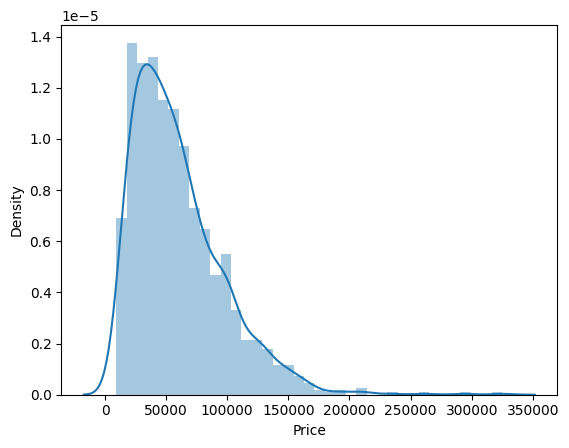

In [12]:
import seaborn as sns
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

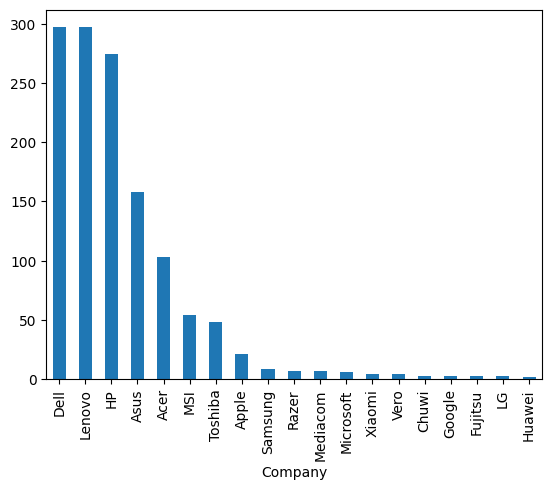

In [13]:
df['Company'].value_counts().plot(kind='bar')

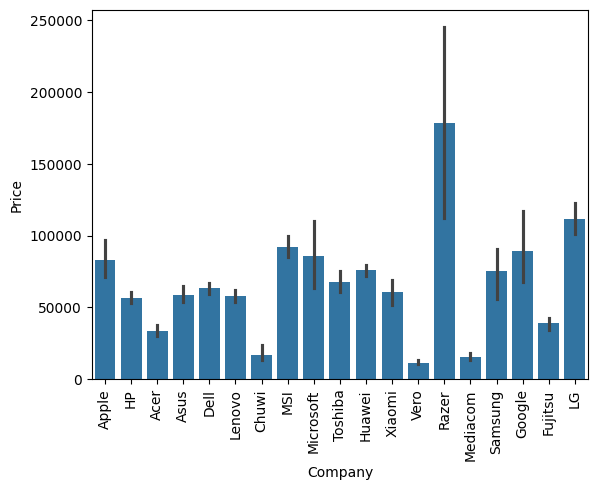

In [14]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()



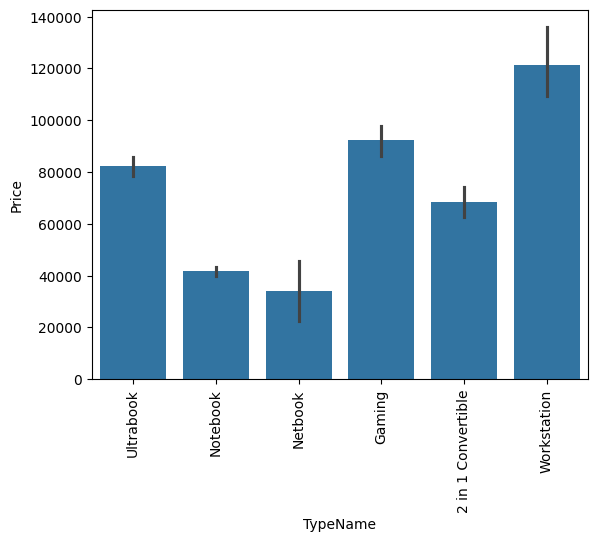

In [15]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

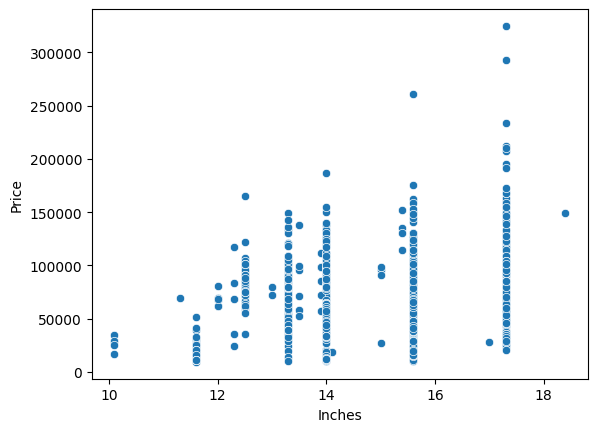

In [16]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

In [17]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [18]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0 )

<Axes: xlabel='Touchscreen'>

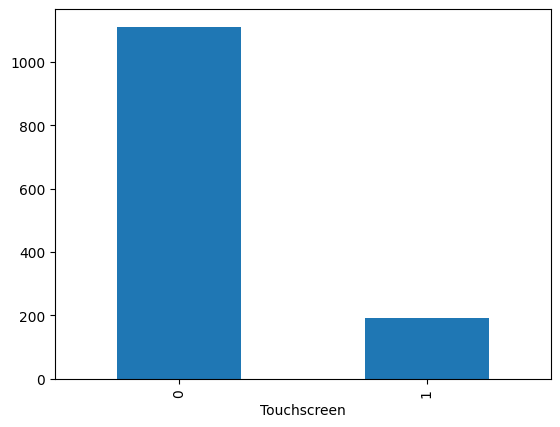

In [19]:
df['Touchscreen'].value_counts().plot(kind='bar')

In [20]:
new=df['ScreenResolution'].str.split('x', n=1, expand=True)

In [21]:
df['x_res']=new[0]
df['y_res']=new[1]

In [22]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,IPS Panel Retina Display 2560,1600


In [23]:
df['x_res']=df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [24]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600


In [25]:
df['x_res'] = df['x_res'].astype('int')
df['y_res']=df['y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  x_res             1303 non-null   int64  
 13  y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(3), object(7)
memory usage: 132.5+ KB


In [26]:
df['ppi']=(((df['x_res']**2)+(df['y_res']**2))**0.5/df['Inches']).astype('float')

In [27]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [28]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005


In [29]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
Intel Core i5 6200U 2.3GHz,68
Intel Core i3 6006U 2GHz,64
Intel Core i7 6500U 2.5GHz,49
Intel Core i7 6700HQ 2.6GHz,43


In [30]:
df['Cpu_name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))


In [31]:
def fetch_processor(text):
    if text =='Intel Core i7' or text =='Intel Core i5' or text =='Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [32]:
df['Cpu brand'] =df['Cpu_name'].apply(fetch_processor)

In [33]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,x_res,y_res,ppi,Cpu_name,Cpu brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

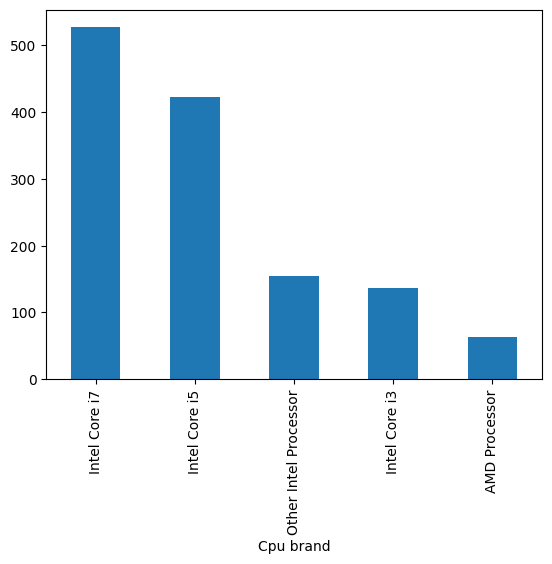

In [34]:
df['Cpu brand'].value_counts().plot(kind='bar')

In [35]:
df.drop(columns=['Cpu','Cpu_name',], inplace=True)
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,x_res,y_res,ppi,Cpu brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

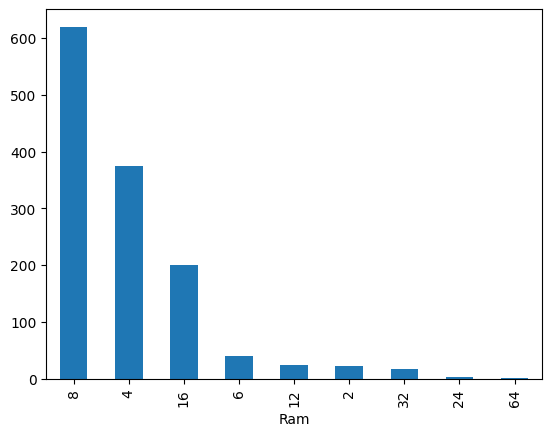

In [36]:
df['Ram'].value_counts().plot(kind='bar')

In [37]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [55]:
import pandas as pd

# Assuming df is your DataFrame

# Split the 'Memory' column into 'first' and 'second'
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

# Extract numeric values from 'first' and 'second'
df['first'] = df['first'].str.extract('(\d+)')
df['second'] = df['second'].str.extract('(\d+)')

# Fill NaN values in 'second' with '0'
df["second"].fillna("0", inplace = True)

# Convert 'first' and 'second' to integers
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# Create flags for HDD, SSD, Hybrid, and Flash Storage
df["Layer1HDD"] = df["Memory"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["Memory"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["Memory"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["Memory"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df["Layer2HDD"] = df["Memory"].apply(lambda x: 1 if "+" in x and "HDD" in x.split("+")[1] else 0)
df["Layer2SSD"] = df["Memory"].apply(lambda x: 1 if "+" in x and "SSD" in x.split("+")[1] else 0)
df["Layer2Hybrid"] = df["Memory"].apply(lambda x: 1 if "+" in x and "Hybrid" in x.split("+")[1] else 0)
df["Layer2Flash_Storage"] = df["Memory"].apply(lambda x: 1 if "+" in x and "Flash Storage" in x.split("+")[1] else 0)

# Calculate the total amount of each type of storage
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

# Drop unnecessary columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [56]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,x_res,y_res,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
665,Toshiba,Notebook,15.6,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.10,26533.4400,0,1366,768,100.454670,Intel Core i3,0,128,0,0,Intel
147,Asus,Notebook,15.6,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.00,18328.3200,0,1920,1080,141.211998,Other Intel Processor,1,0,0,0,Intel
27,Dell,Notebook,15.6,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,42624.0000,0,1920,1080,141.211998,Intel Core i5,0,256,0,0,AMD
1139,HP,Ultrabook,15.6,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.88,115709.2416,0,1920,1080,141.211998,Intel Core i7,0,256,0,0,Intel
1001,HP,Notebook,13.3,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,63349.9200,0,1920,1080,165.632118,Intel Core i5,0,256,0,0,Intel


In [57]:
df.drop(columns=['Memory'],inplace=True)

In [58]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,x_res,y_res,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel Core i5,0,256,0,0,Intel


In [38]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
Nvidia GeForce 940MX,43
AMD Radeon 530,41
Intel HD Graphics 500,39
Intel HD Graphics 400,37


In [40]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,x_res,y_res,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,2560,1600,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,2880,1800,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,2560,1600,226.983005,Intel Core i5,0,256,0,0,Intel


In [41]:
df = df[df['Gpu brand'] != 'ARM']
df['Gpu brand'].value_counts()


,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180


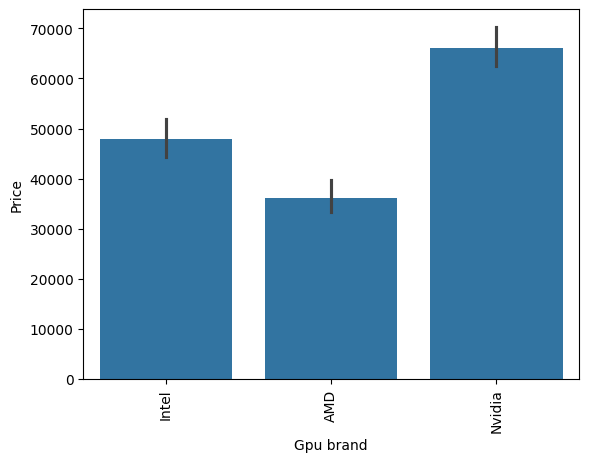

In [42]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

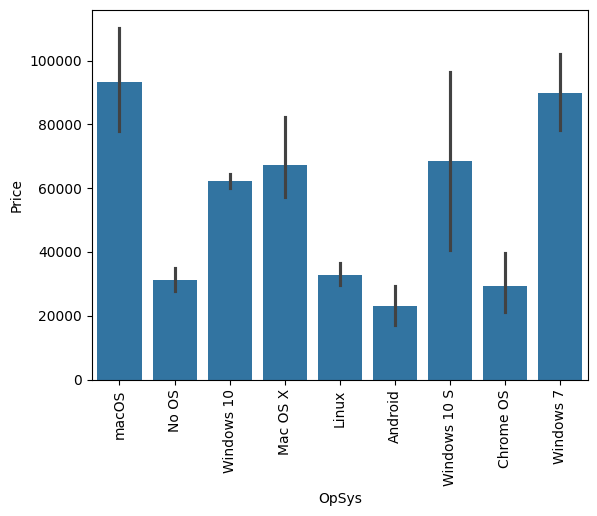

In [43]:
df['OpSys'].value_counts()
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-44-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

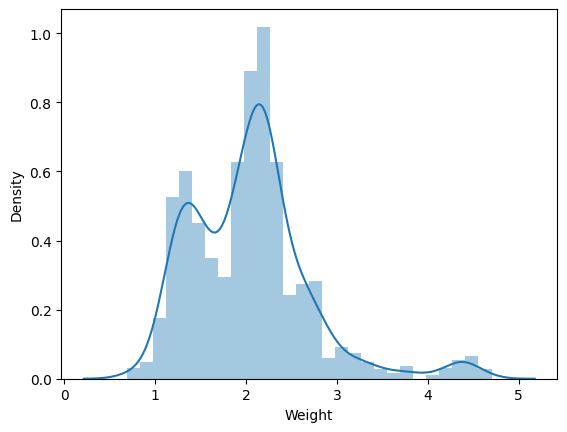

In [44]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

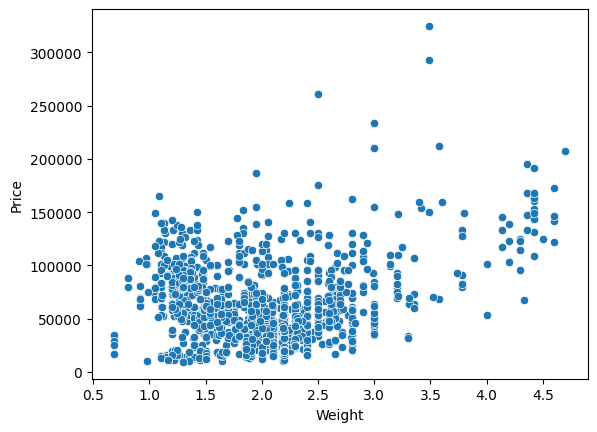

In [45]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [46]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])
X

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Touchscreen,x_res,y_res,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,0,2560,1600,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,0,1440,900,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,0,1920,1080,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,0,2880,1800,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,0,2560,1600,226.983005,Intel Core i5,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,1,1920,1080,157.350512,Intel Core i7,0,128,0,0,Intel
1299,Lenovo,2 in 1 Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1,3200,1800,276.053530,Intel Core i7,0,512,0,0,Intel
1300,Lenovo,Notebook,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,0,1366,768,111.935204,Other Intel Processor,0,0,0,64,Intel
1301,HP,Notebook,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,0,1366,768,100.454670,Intel Core i7,1,0,0,0,AMD


In [47]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
5,9.967026
6,11.644108
7,11.030615
8,11.285443
9,10.621952


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)
X_train

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Touchscreen,x_res,y_res,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
183,Toshiba,Notebook,15.6,8,128GB SSD,Intel HD Graphics 620,Windows 10,2.00,0,1366,768,100.454670,Intel Core i5,0,128,0,0,Intel
1141,MSI,Gaming,15.6,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.40,0,1920,1080,141.211998,Intel Core i7,129,128,0,0,Nvidia
1049,Asus,Netbook,11.6,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.20,0,1366,768,135.094211,Other Intel Processor,0,0,0,16,Intel
1020,Dell,2 in 1 Convertible,15.6,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.08,1,1920,1080,141.211998,Intel Core i3,1,0,0,0,Intel
878,Dell,Notebook,15.6,4,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.18,0,1920,1080,141.211998,Intel Core i5,129,128,0,0,Nvidia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,15.6,4,500GB HDD,Nvidia GeForce GTX 940MX,Windows 10,2.20,0,1366,768,100.454670,Intel Core i3,500,0,0,0,Nvidia
299,Asus,Ultrabook,15.6,16,512GB SSD,Nvidia GeForce 940MX,Windows 10,1.63,0,1920,1080,141.211998,Intel Core i7,0,512,0,0,Nvidia
493,Acer,Notebook,15.6,8,1TB HDD,AMD Radeon RX 540,Windows 10,2.20,0,1366,768,100.454670,AMD Processor,1,0,0,0,AMD
527,Lenovo,Notebook,15.6,8,2TB HDD,Nvidia GeForce 920MX,No OS,2.20,0,1366,768,100.454670,Intel Core i3,2,0,0,0,Nvidia


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [76]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# Load the data
df = pd.read_csv('/content/laptop_data[1].csv')

# Split the data into features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Encode categorical features using LabelEncoder
categorical_features = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for feature in categorical_features:
    X[feature] = le.fit_transform(X[feature])

# Scale numerical features using StandardScaler
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Convert encoded categorical features to one-hot representation
X = pd.get_dummies(X, columns=categorical_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use 'linear' for regression problems

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])  # Use 'mean_squared_error' for regression

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
mse, mae = model.evaluate(X_test, y_test)
print(f'Test MSE: {mse:.3f}, Test MAE: {mae:.3f}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4900951040.0000 - mean_absolute_error: 59617.5547 - val_loss: 4908417536.0000 - val_mean_absolute_error: 58877.2188
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4720667136.0000 - mean_absolute_error: 58899.4102 - val_loss: 4907471872.0000 - val_mean_absolute_error: 58868.9688
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4961957376.0000 - mean_absolute_error: 59894.0156 - val_loss: 4904600064.0000 - val_mean_absolute_error: 58844.0703
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5089326592.0000 - mean_absolute_error: 61082.6211 - val_loss: 4898380800.0000 - val_mean_absolute_error: 58790.1758
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4856902656.0000 - mean_absolute_error: 59310.4062 - val_loss: 4887370752.0000 - val_mean_absolute_error: 58694.5469
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5163975680.0000 - mean_absolute_error: 60992.2656 - val_loss: 4870084096.0000 - val

In [81]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('/content/laptop_data[1].csv')

# Check the available columns in the dataframe
print(df.columns)

# Assuming the column with model information is named 'Product'
# Adjust the column name below if it's different
X_text = vectorizer.fit_transform(df['Company'])  # Replace 'Product' with the actual column name

# Convert the text data into a dense matrix
X_text_dense = X_text.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text_dense, df['Price'], test_size=0.2, random_state=42)  # Also, ensure the target variable is 'Price'

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse:.3f}')

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')
Test MSE: 1151195648.283
